####  다중분류를 위한 OvR(OvA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행

In [108]:
### 모듀로딩 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np 

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)


- 데이터셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지 ==> 1D으로 64개 피쳐
    * 이미지 라벨/타겟 => 숫자 0 ~ 9까지 즉, 총 10개 클래스 
    * 흑백 이미지

In [109]:
## 데이터 로딩
featureDF, targetSR = load_digits(as_frame=True, return_X_y=True)

# 이미지 픽셀 : 0 ~ 255 범위 
featureDF = featureDF/255

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [110]:
featureDF.head(1), targetSR.head(), targetSR.index

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0    0.00000    0.00000    0.01961    0.05098    0.03529    0.00392   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0    0.00000    0.00000    0.02353    0.05098    0.03922    0.00000   
 
    pixel_7_6  pixel_7_7  
 0    0.00000    0.00000  
 
 [1 rows x 64 columns],
 0    0
 1    1
 2    2
 3    3
 4    4
 Name: target, dtype: int32,
 RangeIndex(start=0, stop=1797, step=1))

(8, 8)


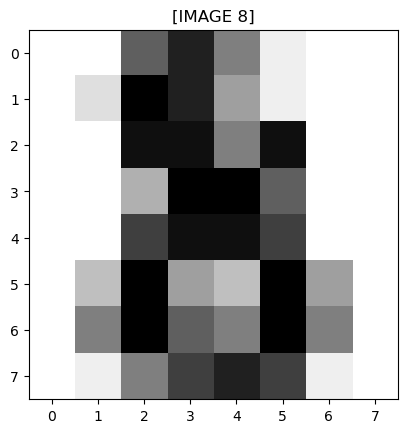

In [111]:
## 이미지 데이터 시각화 
import matplotlib.pyplot as plt 

# 1D ==> 2D 형태로 이미지 데이터
imgData=featureDF.iloc[-1].to_numpy().reshape(-1, 8)
print(imgData.shape)

# 시각화
plt.imshow(imgData, cmap='binary')
plt.title(f'[IMAGE {targetSR[1796]}]')
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS

In [112]:
X_train, X_test, y_train , y_test =  train_test_split(featureDF, 
                                                      targetSR,
                                                      stratify=targetSR,
                                                      random_state=10)

In [113]:
featureDF.describe(), y_train[y_train.index[0]]

(       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 count 1797.00000 1797.00000 1797.00000 1797.00000 1797.00000 1797.00000   
 mean     0.00000    0.00119    0.02041    0.04642    0.04646    0.02267   
 std      0.00000    0.00356    0.01865    0.01666    0.01681    0.02222   
 min      0.00000    0.00000    0.00000    0.00000    0.00000    0.00000   
 25%      0.00000    0.00000    0.00392    0.03922    0.03922    0.00000   
 50%      0.00000    0.00000    0.01569    0.05098    0.05098    0.01569   
 75%      0.00000    0.00000    0.03529    0.05882    0.05882    0.04314   
 max      0.00000    0.03137    0.06275    0.06275    0.06275    0.06275   
 
        pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 count 1797.00000 1797.00000 1797.00000 1797.00000  ... 1797.00000 1797.00000   
 mean     0.00534    0.00051    0.00002    0.00782  ...    0.01461    0.00081   
 std      0.01304    0.00407    0.00037    0.01253  ...    0.01929    0

- OvR(Over vs Rest) 또는 OvA(Over vs All)
    * 클래스마다 이진 분류기 만들어서 가장 높은 결정점수 낸 클래스 선택

In [114]:
# 모듈로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression())
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [115]:
# 모델 파라미터
print(f'ovr_clf.estimators_ : {len(ovr_clf.estimators_)}개' )
print(f'ovr_clf.classes_    : {ovr_clf.classes_}' )
print(f'ovr_clf.classes_    : {ovr_clf.n_classes_ }' )
print(f'ovr_clf.label_binarizer_ : {ovr_clf.label_binarizer_}' )

ovr_clf.estimators_ : 10개
ovr_clf.classes_    : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.classes_    : 10
ovr_clf.label_binarizer_ : LabelBinarizer(sparse_output=True)


In [116]:
from scipy.special import expit, softmax
#print(expit(decisions))

In [173]:
#print(X_train.iloc[:1], y_train[y_train.index[0]])

decision_functions=[]
estimators_prova=[]
predict_probas=[]
for idx in range(ovr_clf.n_classes_):
    decision_functions.append(ovr_clf.estimators_[idx].decision_function(X_train.iloc[:1])[0])
    estimators_prova.append(expit(ovr_clf.estimators_[idx].decision_function(X_train.iloc[:1])[0]))
    print(ovr_clf.estimators_[idx].predict_proba(X_train.iloc[:1]))
    predict_probas.append(ovr_clf.estimators_[idx].predict_proba(X_train.iloc[:1]).tolist()[0][1])
    
print('[decision_functions]', decision_functions)
print('[predict_probas]', predict_probas)
print('sum[predict_probas]', sum(predict_probas))

print('---------------------')
all_result = ovr_clf.decision_function(X_train.iloc[:1])
print('[선형식값]',all_result.tolist()[0])
predict_proba_values=ovr_clf.predict_proba(X_train.iloc[:1])
print(predict_proba_values)


[[0.924448 0.075552]]
[[0.913756 0.086244]]
[[0.905393 0.094607]]
[[0.860393 0.139607]]
[[0.923555 0.076445]]
[[0.871813 0.128187]]
[[0.890954 0.109046]]
[[0.92078 0.07922]]
[[0.920436 0.079564]]
[[0.912155 0.087845]]
[decision_functions] [-2.5043802644471325, -2.3603881315800845, -2.2586408058549936, -1.8185555920385976, -2.491658466037793, -1.9170847719130162, -2.1005255746802383, -2.4529991717688704, -2.4482801634589726, -2.3402410714984874]
[predict_probas] [0.07555167713153006, 0.08624360262451121, 0.09460672835232395, 0.13960728074143958, 0.07644502540599797, 0.12818700493604593, 0.10904574861369348, 0.07921950200894547, 0.07956440850685222, 0.08784459635140475]
sum[predict_probas] 0.9563155746727446
---------------------
[선형식값] [-2.5043802644471325, -2.3603881315800845, -2.2586408058549936, -1.8185555920385976, -2.491658466037793, -1.9170847719130162, -2.1005255746802383, -2.4529991717688704, -2.4482801634589726, -2.3402410714984874]
[[0.079003 0.090183 0.098928 0.145985 0.07993

In [135]:
ovr_clf.predict_proba(X_test.iloc[:1]).max(), ovr_clf.predict_proba(X_test.iloc[:1]).argmax()

(0.1922541458164618, 3)